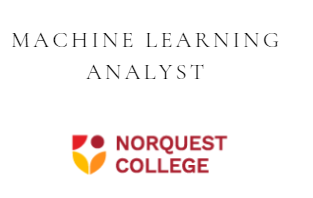

# Machine Learning



# Load cleaned data from previous EDA

In [ ]:
# load kijiji_cleaned.csv

import pandas as pd
data = pd.read_csv('data_set_ML_01.csv')


In [ ]:
data.head()

,CSDUID,Population,CSDNAME,Latitude,Longitude,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type
0,3501005,14211,South Glengarry,45.256161,-74.595385,1.0,1425.0,2.0,1.0,0.0,1.0,1.0,950.0,1 Year
1,3501005,14211,South Glengarry,45.192003,-74.374604,1.0,1100.0,2.0,1.0,0.0,0.0,1.0,780.0,1 Year
2,3501005,14211,South Glengarry,45.143726,-74.502708,2.0,1200.0,2.0,1.5,0.0,0.0,1.0,900.0,1 Year
3,3501005,14211,South Glengarry,45.059039,-74.558464,1.0,1695.0,1.0,1.0,1.0,1.0,1.0,850.0,1 Year
4,3501005,14211,South Glengarry,45.135981,-74.619588,1.0,1095.0,1.0,1.0,0.0,0.0,1.0,600.0,1 Year


# Modelling

# Solution 1: Predicting Price

To begin with regression for price prediction, we'll follow these steps:

1.  **Feature Selection**: Identify which features from the dataset will be used to predict the price. Typically, this includes numerical features like bedrooms, bathrooms, size, and categorical features like property type.
    
2.  **Preprocessing**: Handle categorical features by converting them into a format suitable for regression (e.g., one-hot encoding). Also, ensure that the data is scaled appropriately.
    
3.  **Model Selection**: Choose a regression model. Common choices include linear regression, ridge regression, lasso regression, or more complex models like random forests or gradient boosting machines, depending on the complexity of the dataset.
    
4.  **Model Training**: Train the model on the dataset.
    
5.  **Evaluation**: Evaluate the model's performance using appropriate metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared.

In [ ]:
data.dtypes

CSDUID              int64
Population          int64
CSDNAME            object
Latitude          float64
Longitude         float64
Type              float64
Price             float64
Bedrooms          float64
Bathrooms         float64
Hydro             float64
Heat              float64
Water             float64
Size              float64
Agreement Type     object
dtype: object

##  Import Necessary Libraries

In [ ]:
# Import ColumnTransformer for applying different preprocessing steps to different feature types.
# Import Pipeline to create a sequential data processing pipeline.
# Import train_test_split for splitting data into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



In [ ]:
data.head()

,CSDUID,Population,CSDNAME,Latitude,Longitude,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type
0,3501005,14211,South Glengarry,45.256161,-74.595385,1.0,1425.0,2.0,1.0,0.0,1.0,1.0,950.0,1 Year
1,3501005,14211,South Glengarry,45.192003,-74.374604,1.0,1100.0,2.0,1.0,0.0,0.0,1.0,780.0,1 Year
2,3501005,14211,South Glengarry,45.143726,-74.502708,2.0,1200.0,2.0,1.5,0.0,0.0,1.0,900.0,1 Year
3,3501005,14211,South Glengarry,45.059039,-74.558464,1.0,1695.0,1.0,1.0,1.0,1.0,1.0,850.0,1 Year
4,3501005,14211,South Glengarry,45.135981,-74.619588,1.0,1095.0,1.0,1.0,0.0,0.0,1.0,600.0,1 Year


In [ ]:
data.head()

,CSDUID,Population,CSDNAME,Latitude,Longitude,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Agreement Type
0,3501005,14211,South Glengarry,45.256161,-74.595385,1.0,1425.0,2.0,1.0,0.0,1.0,1.0,950.0,1 Year
1,3501005,14211,South Glengarry,45.192003,-74.374604,1.0,1100.0,2.0,1.0,0.0,0.0,1.0,780.0,1 Year
2,3501005,14211,South Glengarry,45.143726,-74.502708,2.0,1200.0,2.0,1.5,0.0,0.0,1.0,900.0,1 Year
3,3501005,14211,South Glengarry,45.059039,-74.558464,1.0,1695.0,1.0,1.0,1.0,1.0,1.0,850.0,1 Year
4,3501005,14211,South Glengarry,45.135981,-74.619588,1.0,1095.0,1.0,1.0,0.0,0.0,1.0,600.0,1 Year


## Feature Selection

Let's drop Latitude, Longitude and Date. We can use them for a different analysis.


## Prepare Your Data

In [ ]:
data.nunique()

CSDUID             214
Population         212
CSDNAME            213
Latitude          7241
Longitude         6859
Type                 6
Price              827
Bedrooms            10
Bathrooms            7
Hydro                2
Heat                 2
Water                2
Size               628
Agreement Type       3
dtype: int64

In [ ]:
columns_to_drop = ['Latitude','Longitude','Agreement Type',"Population","CSDUID"]
data = data.drop(columns=columns_to_drop)

In [ ]:
data.head()

,CSDNAME,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size
0,South Glengarry,1.0,1425.0,2.0,1.0,0.0,1.0,1.0,950.0
1,South Glengarry,1.0,1100.0,2.0,1.0,0.0,0.0,1.0,780.0
2,South Glengarry,2.0,1200.0,2.0,1.5,0.0,0.0,1.0,900.0
3,South Glengarry,1.0,1695.0,1.0,1.0,1.0,1.0,1.0,850.0
4,South Glengarry,1.0,1095.0,1.0,1.0,0.0,0.0,1.0,600.0


## Data Preprocessing

In [ ]:
# Create a pipeline for preprocessing and model training in one step.
# Convert categorical data to numeric using one-hot encoding
categorical_features = ['CSDNAME','Type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Create a pipeline for preprocessing and model training in one step.

# Preprocessing for numerical features
numerical_features = ['Bedrooms', 'Bathrooms', 'Hydro', 'Heat', 'Water', 'Size']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Let's train the model

In [ ]:
# Define feature matrix X and target y
X = data.drop('Price', axis=1)
y = data['Price']

## Step 3: Split Data into Training and Test Sets

In [ ]:
# Split the dataset into 80% training and 20% testing subsets.
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Step 4: Initialize and Fit the Model

In [ ]:
# Create a pipeline for preprocessing and model training in one step.
# Import Pipeline to create a sequential data processing pipeline.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Create a pipeline that preprocesses the data and then fits a model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])




## Fit/Train the model

In [ ]:
# Train the model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Bedrooms', 'Bathrooms',
                                                   'Hydro', 'Heat', 'Water',
                                                   'Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CSDNAME', 'Type'])])),
                ('regressor', LinearRegression())])

## Evaluate the model

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluate the model using both Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 110431.71931762117
R-squared: 0.6055556286003823


# Compare with other Regressor Models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

Decision Tree

In [ ]:
# Create a pipeline for preprocessing and model training in one step.
# Using pipeline format defined previously

# Decision Tree Regressor Pipeline
dtree_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', DecisionTreeRegressor())])
dtree_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Bedrooms', 'Bathrooms',
                                                   'Hydro', 'Heat', 'Water',
                                                   'Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CSDNAME', 'Type'])])),
                ('regressor', DecisionTreeRegressor())])

In [ ]:
# Predicting the Test set results
y_pred = dtree_model.predict(X_test)

# Evaluate the model using both Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 154598.62018291454
R-squared: 0.4477985497816337


# KNN

In [ ]:
# Create a pipeline for preprocessing and model training in one step.

# K-Neighbors Regressor Pipeline
knn_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', KNeighborsRegressor())])
kn
n_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Bedrooms', 'Bathrooms',
                                                   'Hydro', 'Heat', 'Water',
                                                   'Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CSDNAME', 'Type'])])),
                ('regressor', KNeighborsRegressor())])

In [ ]:
# Predicting the Test set results
y_pred = knn_model.predict(X_test)

# Evaluate the model using both Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 127842.67173459717
R-squared: 0.5433665019253717


# Random Forest

In [ ]:
# Create a pipeline for preprocessing and model training in one step.

# Random Forest Regressor Pipeline
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Bedrooms', 'Bathrooms',
                                                   'Hydro', 'Heat', 'Water',
                                                   'Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CSDNAME', 'Type'])])),
                ('regressor', RandomForestRegressor())])

In [ ]:
# Predicting the Test set results
y_pred = rf_model.predict(X_test)

# Evaluate the model using both Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 112947.98322423556
R-squared: 0.5965679379164639


# Gradient Boost

In [ ]:
# Create a pipeline for preprocessing and model training in one step.

# Gradient Boosting Regressor Pipeline
gb_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])
gb_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Bedrooms', 'Bathrooms',
                                                   'Hydro', 'Heat', 'Water',
                                                   'Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CSDNAME', 'Type'])])),
                ('regressor', GradientBoostingRegressor())])

In [ ]:
# Predicting the Test set results
y_pred = gb_model.predict(X_test)

# Evaluate the model using both Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 106604.50317622062
R-squared: 0.6192258301913152


# Looping through all models

In [ ]:
# Create a pipeline for preprocessing and model training in one step.
def evaluate_models(models, preprocessor, X_train, y_train, X_test, y_test):
    results = {}

    for model_name, model in models.items():
        # Create a pipeline with the preprocessor and the model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', model)])

        # Fit the model
        pipeline.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[model_name] = {'MSE': mse, 'R2': r2}
        print(f"{model_name}: Mean Squared Error = {mse}, R-squared = {r2}")

    return results

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# show model results
model_results = evaluate_models(models, preprocessor, X_train, y_train, X_test, y_test)


Linear Regression: Mean Squared Error = 110431.71931762117, R-squared = 0.6055556286003823
Decision Tree: Mean Squared Error = 154434.40166329898, R-squared = 0.448385111968134
K-Nearest Neighbors: Mean Squared Error = 127842.67173459717, R-squared = 0.5433665019253717
Random Forest: Mean Squared Error = 112628.10004585498, R-squared = 0.5977105092718435
Gradient Boosting: Mean Squared Error = 106604.39938771697, R-squared = 0.6192262009071868


# Save the best performing model

In [ ]:
!pip install joblib


In [ ]:
import joblib

# Assuming 'random_forest' is your best trained Random Forest Regressor model
model = gb_model  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'gradient_boost_regressor_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


['gradient_boost_regressor_model.pkl']

# Determine Feature Imporance- Regression Models

In [ ]:
#get feature importance for dtree_model

print(f'Feature Importances:')
for name, importance in zip(X_train.columns, dtree_model['regressor'].feature_importances_):
  print(f'{name}: {importance}')

Feature Importances:
CSDNAME: 0.14071649007244252
Type: 0.09465173945285293
Bedrooms: 0.01880655766323491
Bathrooms: 0.021068341929294482
Hydro: 0.014836267387780976
Heat: 0.18326309023260037
Water: 0.0001628468395999331
Size: 0.0003789613590333108


In [ ]:
# #extract feature importances and as a list

importances = dtree_model['regressor'].feature_importances_
feature_names = X_train.columns
feature_importances = list(zip(feature_names, importances))
print(feature_importances)


[('CSDNAME', 0.14071649007244252), ('Type', 0.09465173945285293), ('Bedrooms', 0.01880655766323491), ('Bathrooms', 0.021068341929294482), ('Hydro', 0.014836267387780976), ('Heat', 0.18326309023260037), ('Water', 0.0001628468395999331), ('Size', 0.0003789613590333108)]


# Visualize feature_importances



In [ ]:
import matplotlib.pyplot as plt

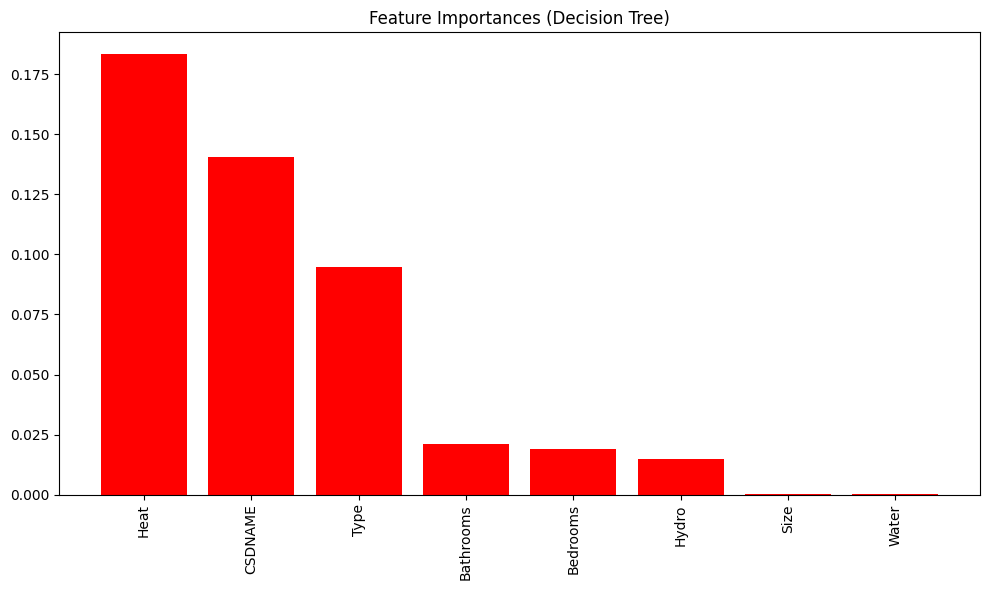

In [ ]:


# Sort the features by importance
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Extract feature names and importances
feature_names, importances = zip(*feature_importances)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(len(feature_names)), importances, color="r", align="center")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.tight_layout()
plt.show()


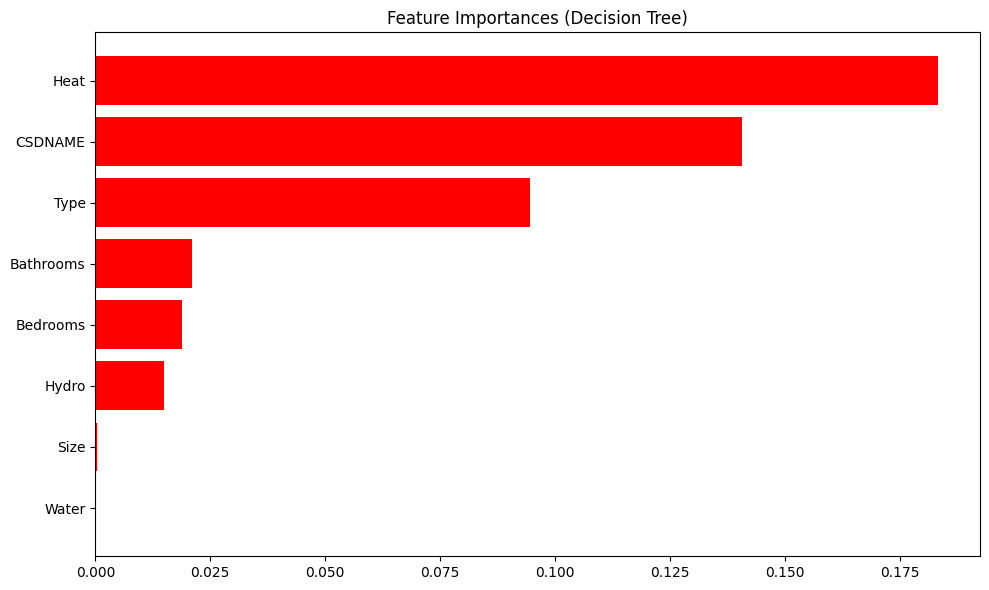

In [ ]:

# Sort the features by importance
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)

# Extract feature names and importances
feature_names, importances = zip(*feature_importances)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.barh(range(len(feature_names)), importances, color="r", align="center")
plt.yticks(range(len(feature_names)), feature_names)
plt.tight_layout()
plt.show()


In [ ]:
#get feature importance for Gradient boost _model

print(f'Feature Importances:')
for name, importance in zip(X_train.columns, gb_model['regressor'].feature_importances_):
  print(f'{name}: {importance}')

Feature Importances:
CSDNAME: 0.16675323373520104
Type: 0.17960511485085476
Bedrooms: 0.007299882315164795
Bathrooms: 0.0007120675013957749
Hydro: 0.00939130119763851
Heat: 0.06524069888346455
Water: 0.0
Size: 0.0


In [ ]:
# #extract feature importances and as a list

importances = gb_model['regressor'].feature_importances_
feature_names = X_train.columns
feature_importances = list(zip(feature_names, importances))


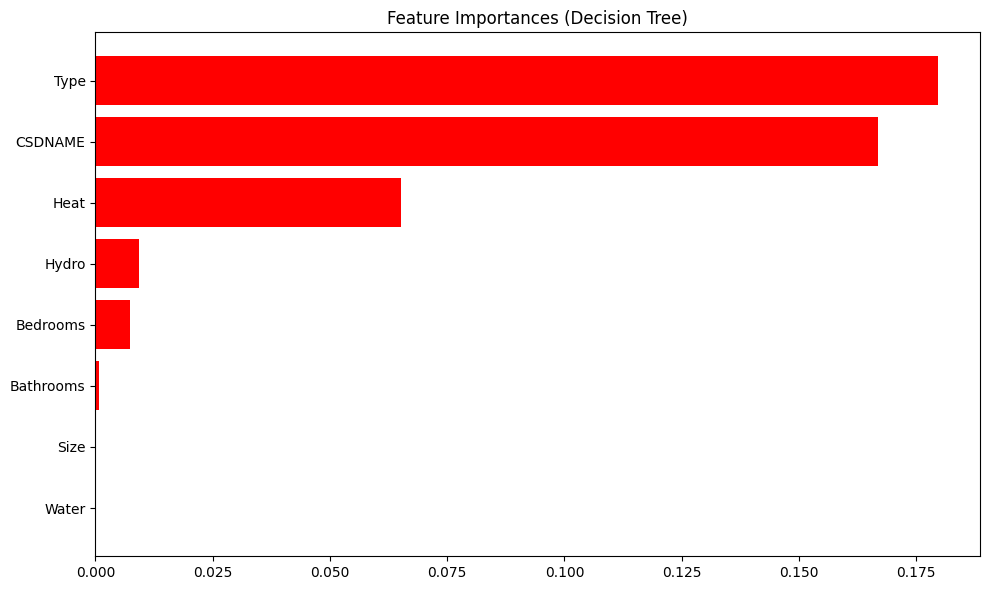

In [ ]:
#Visualize
# Sort the features by importance
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)

# Extract feature names and importances
feature_names, importances = zip(*feature_importances)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.barh(range(len(feature_names)), importances, color="r", align="center")
plt.yticks(range(len(feature_names)), feature_names)
plt.tight_layout()
plt.show()


# Solution 2: Convert to a Classification Problem

# Define Price Categories

For example, you can categorize properties into 'low', 'medium', and 'high' price ranges based on the value of the 'Price' column.

In [ ]:
data['Price Category'] = pd.cut(data['Price'],
                                bins=[0, 1500, 2500, float('inf')],
                                labels=['low', 'medium', 'high'])


# Check for Data imbalance

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'Success' column
success_counts = data['Price Category'].value_counts()




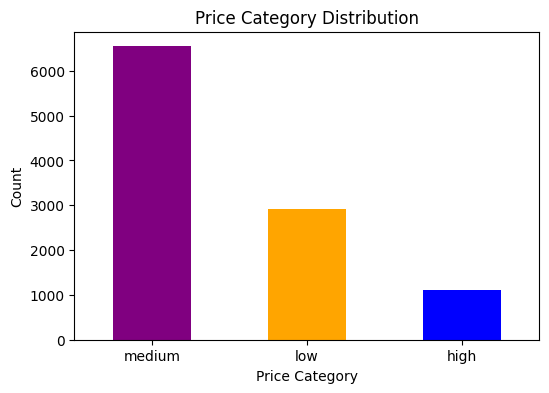

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['purple', 'orange','blue'])
plt.title('Price Category Distribution')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Consider reducing your threshold for better balance. First bin must always be 0 to capture all price ranges



Rerun visualization to see if we have a balance with the new price thresholds

## Data Preprocessing

In [ ]:
# Create a pipeline for preprocessing and model training in one step.
# Convert categorical data to numeric using one-hot encoding
categorical_features = ['CSDNAME','Type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Create a pipeline for preprocessing and model training in one step.

# Preprocessing for numerical features
numerical_features = ['Bedrooms', 'Bathrooms', 'Hydro', 'Heat', 'Water', 'Size']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Let's train the model

# Import Classifier Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Random Forest model initialization.
# Decision Tree model initialization.
# Logistic Regression model initialization.
# Update your models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()

}


In [ ]:
# Define your target and features
X = data.drop(['Price', 'Price Category'], axis=1)  # Drop the original Price column
y = data['Price Category']


## Step 3: Split Data into Training and Test Sets

In [ ]:
# Split the dataset into 80% training and 20% testing subsets.
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Create a pipeline for preprocessing and model training in one step.
# Train and evaluate models
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),  # Use your preprocessor
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:

              precision    recall  f1-score   support

        high       0.77      0.57      0.66       200
         low       0.75      0.64      0.69       591
      medium       0.80      0.88      0.84      1319

    accuracy                           0.79      2110
   macro avg       0.77      0.70      0.73      2110
weighted avg       0.78      0.79      0.78      2110

Decision Tree Classification Report:

              precision    recall  f1-score   support

        high       0.57      0.65      0.61       200
         low       0.67      0.70      0.68       591
      medium       0.81      0.78      0.80      1319

    accuracy                           0.75      2110
   macro avg       0.69      0.71      0.70      2110
weighted avg       0.75      0.75      0.75      2110

Random Forest Classification Report:

              precision    recall  f1-score   support

        high       0.64      0.61      0.63       200
         

*Which model performed best?*

# Save the best performing model

In [ ]:


# Assuming 'random_forest_classifier' is your best trained Random Forest Classifier model
model = 'Random Forest'  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'random_forest_classifier_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


['random_forest_classifier_model.pkl']